In [1]:
# calculo taxa de retorno simples

In [2]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#ações da
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1') 

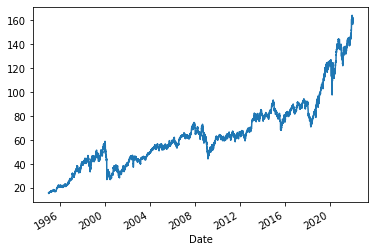

In [4]:
PG['Close'].plot();

In [5]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.971124
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.907221
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.795402
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.811378
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.779430


In [6]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-21,165.350006,162.100006,163.000000,162.619995,10899800.0,162.619995
2022-01-24,164.119995,158.720001,163.429993,161.300003,14846700.0,161.300003
2022-01-25,161.300003,157.889999,160.449997,159.539993,9369600.0,159.539993
2022-01-26,159.570007,156.380005,157.339996,158.149994,10705500.0,158.149994
2022-01-27,161.350006,158.580002,158.729996,159.130005,9083000.0,159.130005


In [7]:
# (close(1)/close(0))-1
# pct.change() metodo faz calculo
PG['Retorno-simples'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
PG

,High,Low,Open,Close,Volume,Adj Close,Retorno-simples
Date,,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,7.971124,NaN
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,7.907221,-0.008017
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,7.795402,-0.014141
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,7.811378,0.002049
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,7.779430,-0.004090
...,...,...,...,...,...,...,...
2022-01-21,165.350006,162.100006,163.000000,162.619995,10899800.0,162.619995,0.003827
2022-01-24,164.119995,158.720001,163.429993,161.300003,14846700.0,161.300003,-0.008117
2022-01-25,161.300003,157.889999,160.449997,159.539993,9369600.0,159.539993,-0.010911


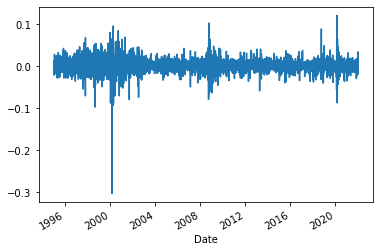

In [8]:
PG['Retorno-simples'].plot();

In [9]:
#configuração da plotagem dos graficos
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

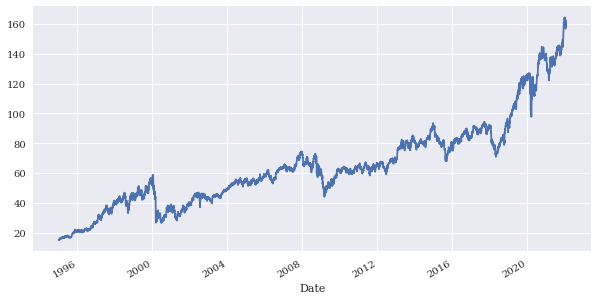

In [10]:
PG['Close'].plot(figsize=(10, 5));

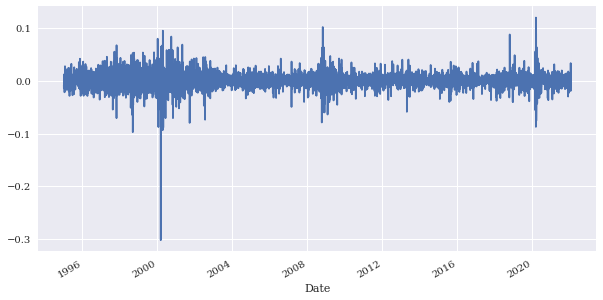

In [11]:
PG['Retorno-simples'].plot(figsize=(10, 5));

In [12]:
# média dos retornos diarios PG
avg_returns_d = PG['Retorno-simples'].mean()
avg_returns_d

0.0005393867197863455

In [13]:
# média dos retornos anuais PG
avg_returns_a = PG['Retorno-simples'].mean() * 250 # média de dias de negociação
avg_returns_a

0.1348466799465864

In [14]:
print( str (round(avg_returns_a, 5) * 100) + ' %')

13.485 %


In [15]:
# retornos logaritmos 
PG['Retornos-log'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG['Retornos-log']

Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2022-01-21    0.003820
2022-01-24   -0.008150
2022-01-25   -0.010971
2022-01-26   -0.008751
2022-01-27    0.006178
Name: Retornos-log, Length: 6817, dtype: float64

In [16]:
log_return_d = PG['Retornos-log'].mean()
log_return_d

0.00043924530158237767

In [17]:
log_return_a = PG['Retornos-log'].mean() * 250
log_return_a

0.10981132539559442

In [18]:
print( str (round(log_return_a, 5) * 100) + ' %')

10.981 %


In [19]:
# usar retorno simples quando estamos avaliando varias ações ao mesmo tempo
# usar retorno logaritmo quando estamos avaliando uma unica ação

In [20]:
# Calculando retorno de um portifólio

In [21]:
# lista com ticker das ações 
tickers = ['PG', 'MSFT', 'F', 'GE']
dados = pd.DataFrame()

for t in tickers:
    dados[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [22]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6817 entries, 1995-01-03 to 2022-01-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6817 non-null   float64
 1   MSFT    6817 non-null   float64
 2   F       6817 non-null   float64
 3   GE      6817 non-null   float64
dtypes: float64(4)
memory usage: 266.3 KB


In [23]:
dados.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.971117,2.374854,4.358237,32.877319
1995-01-04,7.907219,2.392118,4.475500,32.877319
1995-01-05,7.795403,2.352660,4.436411,32.957890
1995-01-06,7.811376,2.392118,4.436411,32.796741
1995-01-09,7.779425,2.377320,4.514586,32.474407


In [24]:
dados.tail()

,PG,MSFT,F,GE
Date,,,,
2022-01-21,162.619995,296.029999,20.650000,96.300003
2022-01-24,161.300003,296.369995,20.389999,96.910004
2022-01-25,159.539993,288.489990,19.980000,91.110001
2022-01-26,158.149994,296.709991,19.910000,89.320000
2022-01-27,159.130005,299.839996,19.549999,89.900002


In [25]:
dados.iloc[0]

PG       7.971117
MSFT     2.374854
F        4.358237
GE      32.877319
Name: 1995-01-03 00:00:00, dtype: float64

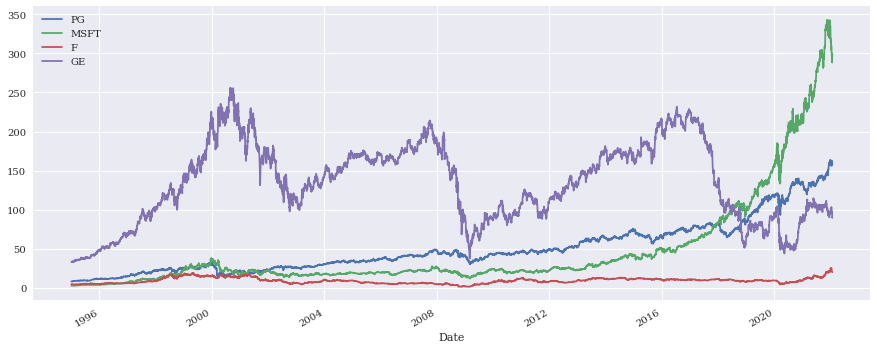

In [26]:
# plotagem sem normalizar
dados.plot(figsize=(15, 6));

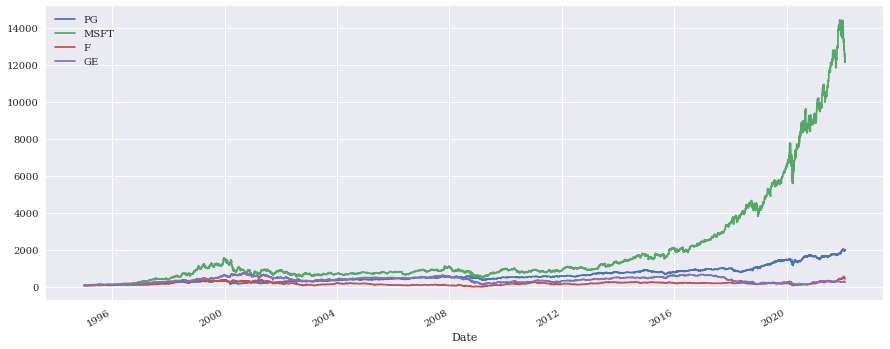

In [27]:
# normalização dos dados base 100
(dados / dados.iloc[0] * 100).plot(figsize=(15, 6));

In [28]:
dados.loc['1995-01-03'] # rótulo

PG       7.971117
MSFT     2.374854
F        4.358237
GE      32.877319
Name: 1995-01-03 00:00:00, dtype: float64

In [29]:
dados.iloc[0] # indice

PG       7.971117
MSFT     2.374854
F        4.358237
GE      32.877319
Name: 1995-01-03 00:00:00, dtype: float64

In [30]:
# calculando retorno do portifólio
retornos = (dados / dados.shift(1)) - 1

In [31]:
retornos.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [32]:
# lista com pesos 
pesos = np.array([0.25, 0.25, 0.25, 0.25])

In [33]:
# np.dot calcula o produto de um vetor o matriz - produto escalar
np.dot(retornos, pesos)


array([        nan,  0.00653981, -0.00922982, ..., -0.02936427,
       -0.00084236,  0.00128947])

In [34]:
anual_retornos = retornos.mean() * 250
anual_retornos

PG      0.134847
MSFT    0.226428
F       0.135132
GE      0.088197
dtype: float64

In [35]:
np.dot(anual_retornos, pesos)

0.14615089826395913

In [36]:
portifolio = str(round(np.dot(anual_retornos, pesos), 5) * 100) + '%'

In [37]:
portifolio

'14.615%'

In [38]:
# comparando com pesos de outra carteira
pesos_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [39]:
portifolio_2 = str(round(np.dot(anual_retornos, pesos_2), 5) * 100) + '%'

In [40]:
portifolio_2

'16.919%'

In [41]:
print(portifolio)
print(portifolio_2)

14.615%
16.919%


In [42]:
# indice de açoes 
indices = ['^GSPC', # S&P500
           '^IXIC', # NASDAQ
           '^GDAXI', # DAX alemanha
           '^BVSP', # BOVESP Brasil
           ]

In [43]:
dados_ind = pd.DataFrame()

for i in  indices:
    dados_ind[i] = wb.DataReader(i, data_source='yahoo', start='1997-1-1')['Adj Close']

In [44]:
dados_ind.head()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,6955.500000
1997-01-03,748.030029,1310.680054,2863.260010,6997.799805
1997-01-06,747.650024,1316.400024,2890.199951,7159.500000
1997-01-07,753.229980,1327.729980,2876.340088,7159.500000
1997-01-08,748.409973,1320.349976,2904.080078,7427.000000


In [45]:
dados_ind.tail()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2022-01-21,4397.939941,13768.919922,15603.879883,108805.0
2022-01-24,4410.129883,13855.129883,15011.129883,107752.0
2022-01-25,4356.450195,13539.290039,15123.870117,109845.0
2022-01-26,4349.930176,13542.120117,15459.389648,111573.0
2022-01-27,4326.509766,13352.780273,15524.269531,112315.0


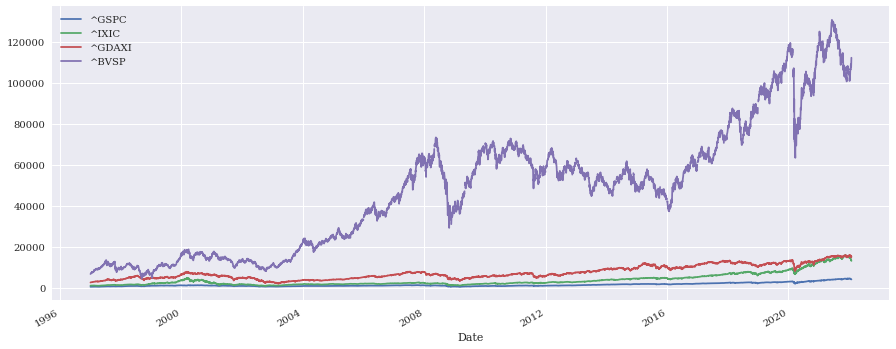

In [46]:
# plotagem sem normalizar 
dados_ind.plot(figsize=(15, 6));

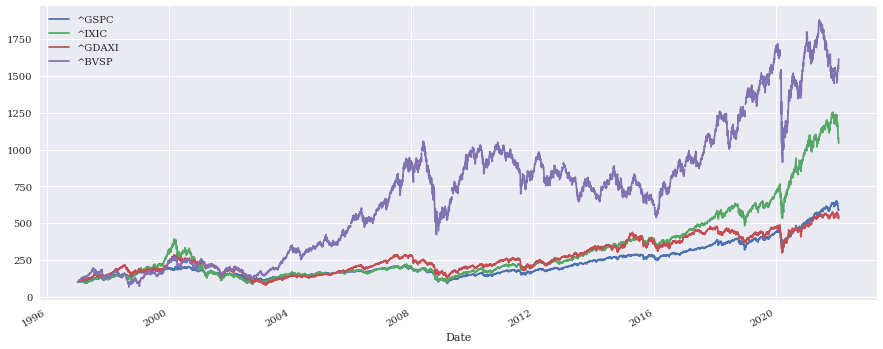

In [47]:
# normalização dos dados base 100
(dados_ind / dados_ind.iloc[0] * 100).plot(figsize=(15, 6));

In [48]:
indices_retornos = (dados_ind / dados_ind.shift(1)) - 1
indices_retornos.tail()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2022-01-21,-0.018915,-0.027208,-0.019384,-0.002722
2022-01-24,0.002772,0.006261,-0.037987,-0.009678
2022-01-25,-0.012172,-0.022796,0.007510,0.019424
2022-01-26,-0.001497,0.000209,0.022185,0.015731
2022-01-27,-0.005384,-0.013982,0.004197,0.006650


In [49]:
anual_indices_retornos = indices_retornos.mean() * 250
anual_indices_retornos

^GSPC     0.089099
^IXIC     0.124033
^GDAXI    0.079988
^BVSP     0.146211
dtype: float64

In [50]:
# comparação com o melhor indice/ação/indice com pesos iguais DJI
tickers_comp = ['PG', '^GSPC', '^DJI']

comp_precos = pd.DataFrame()

for t in tickers_comp:
    comp_precos[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [51]:
comp_precos.tail()

,PG,^GSPC,^DJI
Date,,,
2022-01-21,162.619995,4397.939941,34265.371094
2022-01-24,161.300003,4410.129883,34364.500000
2022-01-25,159.539993,4356.450195,34297.730469
2022-01-26,158.149994,4349.930176,34168.089844
2022-01-27,159.130005,4326.509766,34160.781250


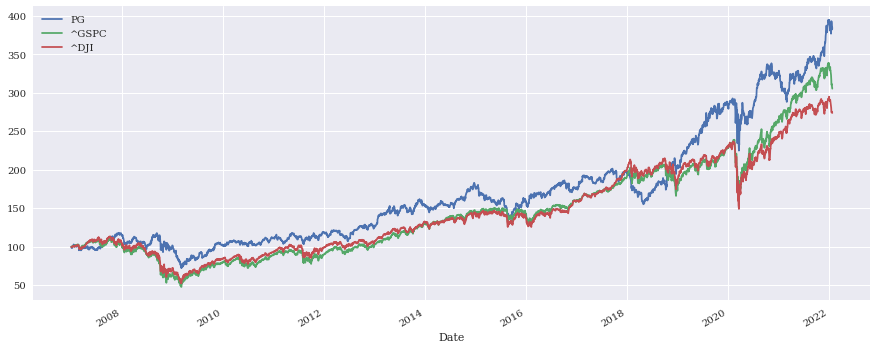

In [52]:
# normalização para ver performace durante um periodo
(comp_precos / comp_precos.iloc[0] * 100).plot(figsize=(15, 6))
plt.show() 

In [53]:
# medindo risco de um ativo

In [54]:
tickers_risco = ['PG', 'BEI.DE']
sec_data = pd.DataFrame()

for t in tickers_risco:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [55]:
sec_data.tail()

,PG,BEI.DE
Date,,
2022-01-21,162.619995,90.379997
2022-01-24,161.300003,89.800003
2022-01-25,159.539993,92.040001
2022-01-26,158.149994,90.820000
2022-01-27,159.130005,91.459999


In [56]:
sec_retornos = np.log(sec_data / sec_data.shift(1))

In [57]:
sec_retornos

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002202,0.000202
2007-01-09,-0.002517,-0.022858
...,...,...
2022-01-21,0.003820,0.000443
2022-01-24,-0.008150,-0.006438
2022-01-25,-0.010971,0.024638


In [58]:
# média diária
sec_retornos['PG'].mean()

0.0003550994346335037

In [59]:
# média anual
sec_retornos['PG'].mean() *250

0.08877485865837594

In [60]:
# desvio padrão
sec_retornos['PG'].std()

0.01171234493287331

In [61]:
# anualizando desvio padrão
sec_retornos['PG'].std() *250 **0.5 # desvio padrão é a raiz quadrada da variancia

0.18518843364705792

In [62]:
sec_retornos['BEI.DE'].mean()

0.00019062241330687114

In [63]:
sec_retornos['BEI.DE'].mean() *250

0.04765560332671778

In [64]:
sec_retornos['BEI.DE'].std()

0.013685008229357296

In [65]:
sec_retornos['BEI.DE'].std() *250 **0.5

0.21637897901458503

In [66]:
print(sec_retornos['PG'].mean() *250)
print(sec_retornos['BEI.DE'].mean() *250)

0.08877485865837594
0.04765560332671778


In [67]:
sec_retornos[['PG', 'BEI.DE']].mean() *250

PG        0.088775
BEI.DE    0.047656
dtype: float64

In [68]:
sec_retornos[['PG', 'BEI.DE']].std() *250 *0.5

PG        1.464043
BEI.DE    1.710626
dtype: float64

In [69]:
# calculando Covariancia e correlação
PG_var = sec_retornos['PG'].var()

In [70]:
BEI_var = sec_retornos['BEI.DE'].var()

In [71]:
PG_var = sec_retornos['PG'].var() *250

In [72]:
BEI_var = sec_retornos['BEI.DE'].var() *250

In [73]:
# calculo de covariancia em uma tabela de valores
cov_matrix = sec_retornos.cov()
cov_matrix

,PG,BEI.DE
PG,0.000137,0.000043
BEI.DE,0.000043,0.000187


In [74]:
cov_matrix_a = sec_retornos.cov() *250
cov_matrix_a

,PG,BEI.DE
PG,0.034295,0.01076
BEI.DE,0.010760,0.04682


In [75]:
# calculo ccorrelação
corr_matrix = sec_retornos.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.268147
BEI.DE,0.268147,1.000000


In [76]:
# não devemos anualizar a tabela de correção

In [77]:
# calculo risco portifolio
pesos_3 = np.array([0.5, 0.5])

In [78]:
portifolio_var = np.dot(pesos_3.T, np.dot(sec_retornos.cov() *250, pesos_3))
portifolio_var

0.025658830664098728

In [79]:
# volatilidade portifolio
portifolio_vol = (np.dot(pesos_3.T, np.dot(sec_retornos.cov() *250, pesos_3))) **0.5
portifolio_vol

0.1601837403237255

In [80]:
print(str(round(portifolio_vol, 5) *100) + ' %')

16.018 %


In [81]:
# calculando risco de portifólio diversificado e não diversificado
# risco diversificado == variancia do portifolio - variancia anual ponderada
PG_var_a = sec_retornos[['PG']].var() *250
PG_var_a

PG    0.034295
dtype: float64

In [82]:
BEI_var_a = sec_retornos[['BEI.DE']].var() *250
BEI_var_a

BEI.DE    0.04682
dtype: float64

In [83]:
risco_div = portifolio_var - (pesos_3[0] **2 * PG_var_a) - (pesos_3[1] **2 * BEI_var_a)
risco_div

BEI.DE   NaN
PG       NaN
dtype: float64

In [84]:
float(PG_var_a)

0.034294755956650776

In [85]:
PG_var_a = sec_retornos['PG'].var() *250
PG_var_a

0.034294755956650776

In [86]:
BEI_var_a = sec_retornos['BEI.DE'].var() *250
BEI_var_a

0.04681986255939423

In [87]:
risco_div = portifolio_var - (pesos_3[0] **2 * PG_var_a) - (pesos_3[1] **2 * BEI_var_a)
risco_div

0.0053801760350874785

In [88]:
print(str(round(risco_div *100, 3)) + ' %')

0.538 %


In [89]:
n_dr_1 = portifolio_var - risco_div
n_dr_1 = round(n_dr_1, 10)
n_dr_1

0.0202786546

In [90]:
n_dr_2 = (pesos_3[0] **2 *PG_var_a) + (pesos_3[1] **2 *BEI_var_a)
n_dr_2 = round(n_dr_2, 10)
n_dr_2

0.0202786546

In [91]:
n_dr_1 == n_dr_2

True

In [92]:
# Regressão para analise financeira
# uso do arquivo Housing.xlsx

In [113]:
# libs para regressão
import scipy as stats
import statsmodels.api as sm

In [94]:
data = pd.read_excel('../arquivos/Housing.xlsx')

In [97]:
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [99]:
data[['House Price', 'House Size (sq.ft.)']].head()

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270


In [100]:
x = data['House Size (sq.ft.)']
y = data['House Price']

In [102]:
x.head()

0    1940
1    1300
2    1420
3    1680
4    1270
Name: House Size (sq.ft.), dtype: int64

In [103]:
y.head()

0    1116000
1     860000
2     818400
3    1000000
4     640000
Name: House Price, dtype: int64

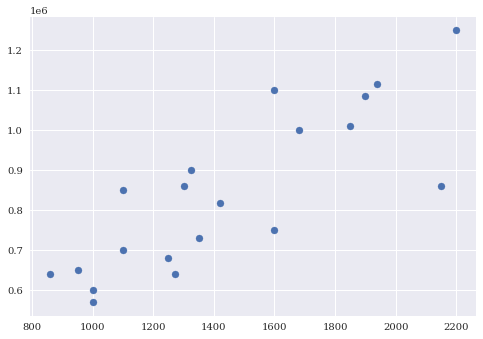

In [104]:
plt.scatter(x, y)
plt.show();

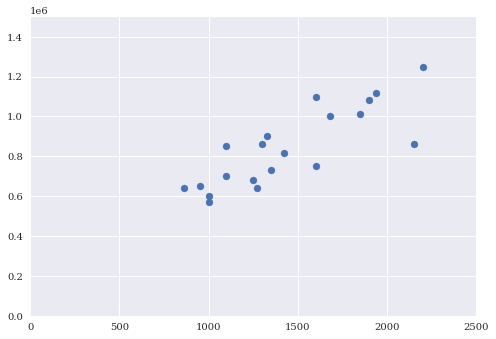

In [105]:
# importante definir valores comparativos(0 ponto inicial, um pouco depois do ponto final)
# plt.axis definem valores do grafico
plt.scatter(x, y)
plt.axis([0,2500, 0, 1500000])
plt.show();

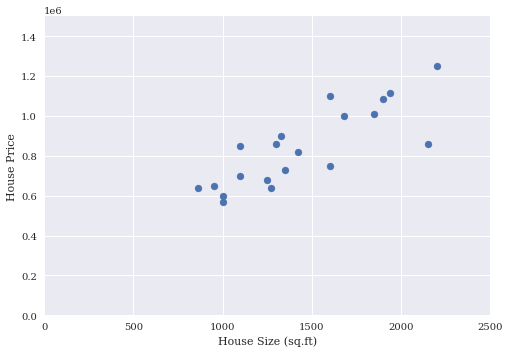

In [106]:
# gráficos devem ter legendas para melhor entendimento
plt.scatter(x, y)
plt.axis([0,2500, 0, 1500000])
plt.xlabel('House Size (sq.ft)')
plt.ylabel('House Price')
plt.show();

In [107]:
# calculando alpha, beta, r^2

In [116]:
X1 = sm.add_constant(x)

reg = sm.OLS(y, X1).fit()

In [117]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           8.13e-06
Time:                        10:46:35   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
# usando a lib do scipy
slope, intercept, r_value, p_value, std_err = stats.stats.linregress(x, y)

In [121]:
print(slope)
print(intercept)
print(r_value)
print(r_value **2)
print(p_value)
print(std_err)

401.91628631922595
260806.2360560964
0.8235775534696924
0.678279986579124
8.129642377231308e-06
65.24299510636492
